I. Data Collection and Preprocessing
1. Data source:
    /kaggle/input/playground-series-s4e5
2. Data Loading:

In [3]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import math

import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots


from sklearn.model_selection import train_test_split
from pandas.plotting import bootstrap_plot
import plotly.express as px
from time import time
import catboost
import xgboost
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,make_scorer
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

In [4]:
#LOADING DATA

df=pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
sample_data=pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [5]:
pd.set_option('display.max_rows', None)
df.head(4)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535


In [6]:
#DATA EXPLORATION
df.isna().sum()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop('id', axis=1, inplace=True)

II. EDA
1. Histogram distribution

In [11]:
factors=df.keys()

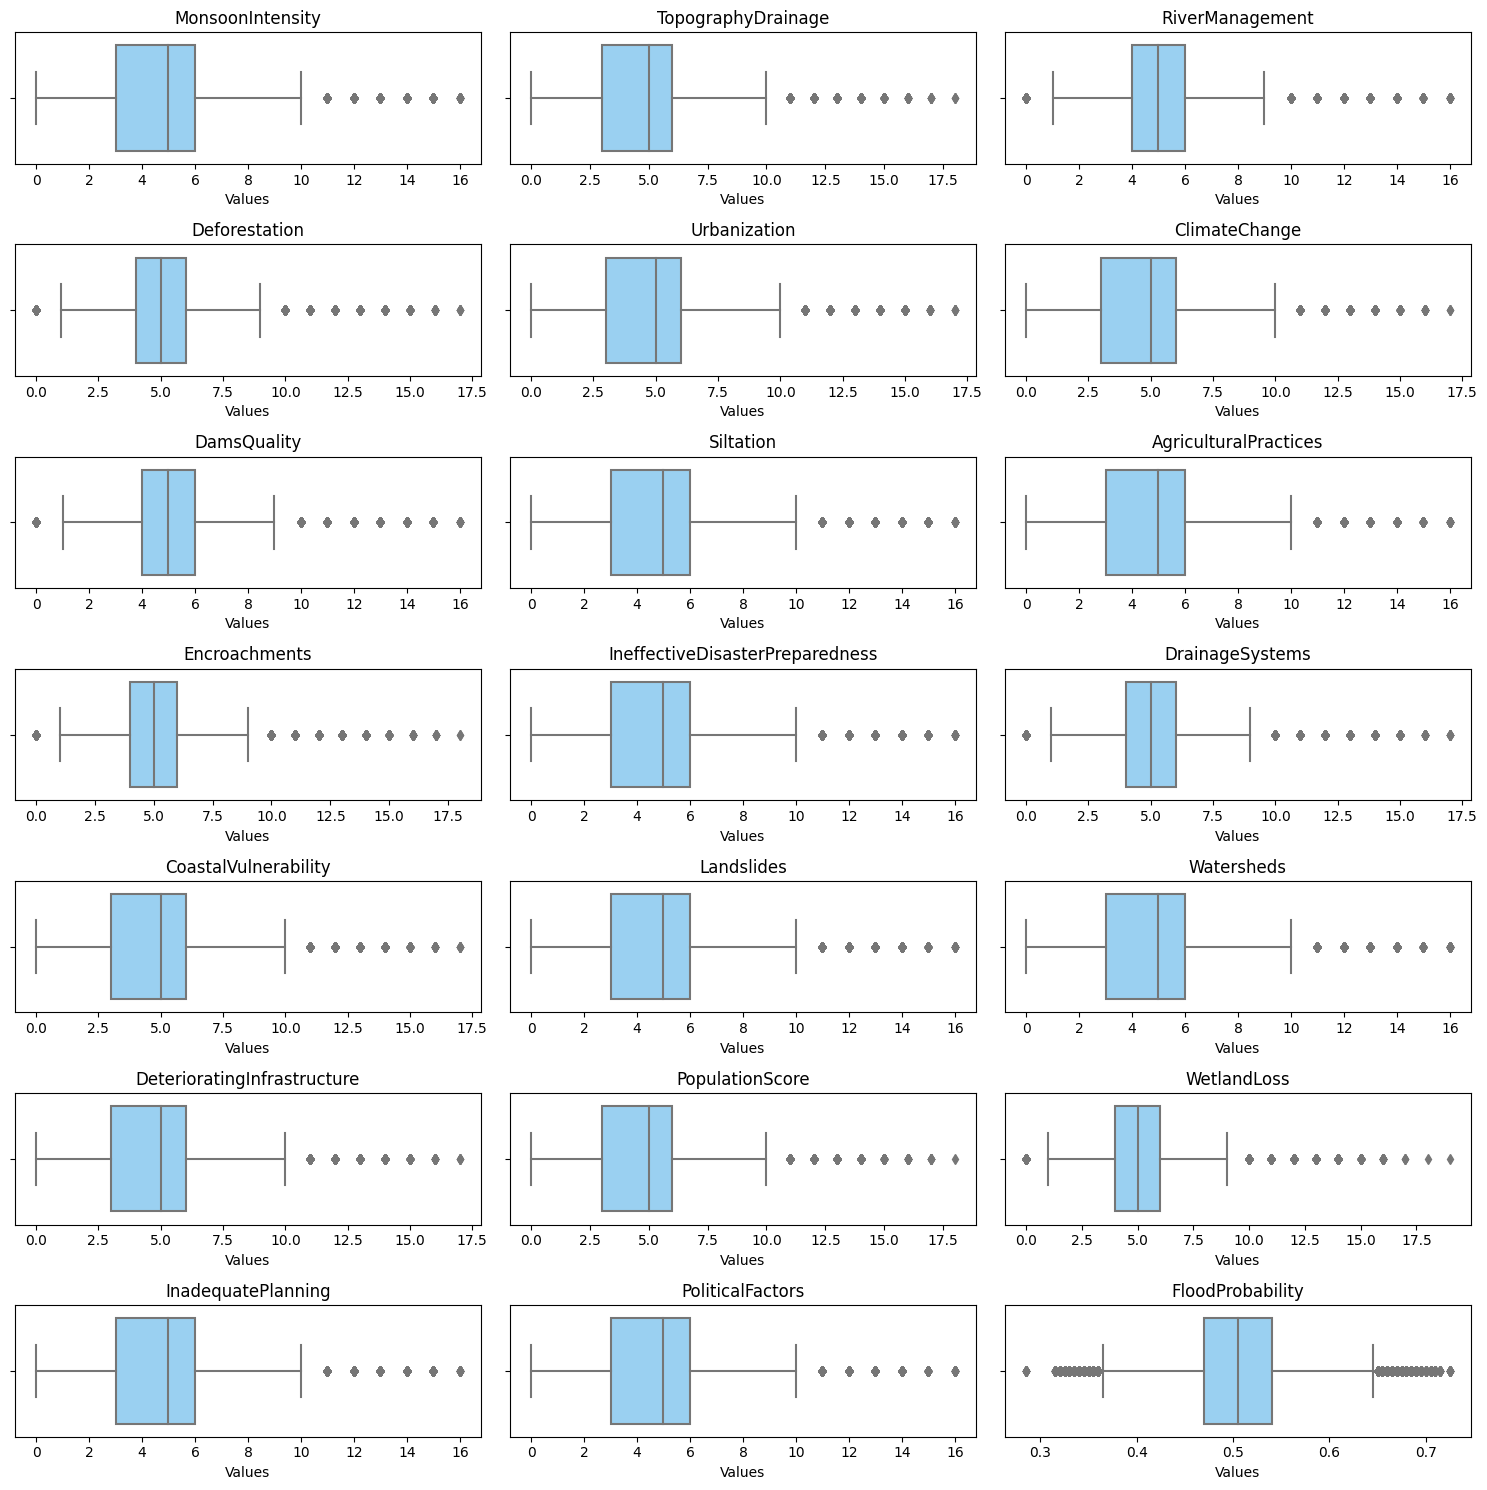

In [12]:
fig, axes = plt.subplots(7, 3, figsize=(15, 15))  # Create a 5x4 grid of subplots

for fac, ax in zip(factors, axes.flat):  # Loop over each factor and corresponding subplot
    sns.boxplot(data=df, x=fac, color='#8cd3ff',ax=ax)
    ax.set_title(fac)
    ax.set_xlabel('Values')
plt.tight_layout()
plt.show()

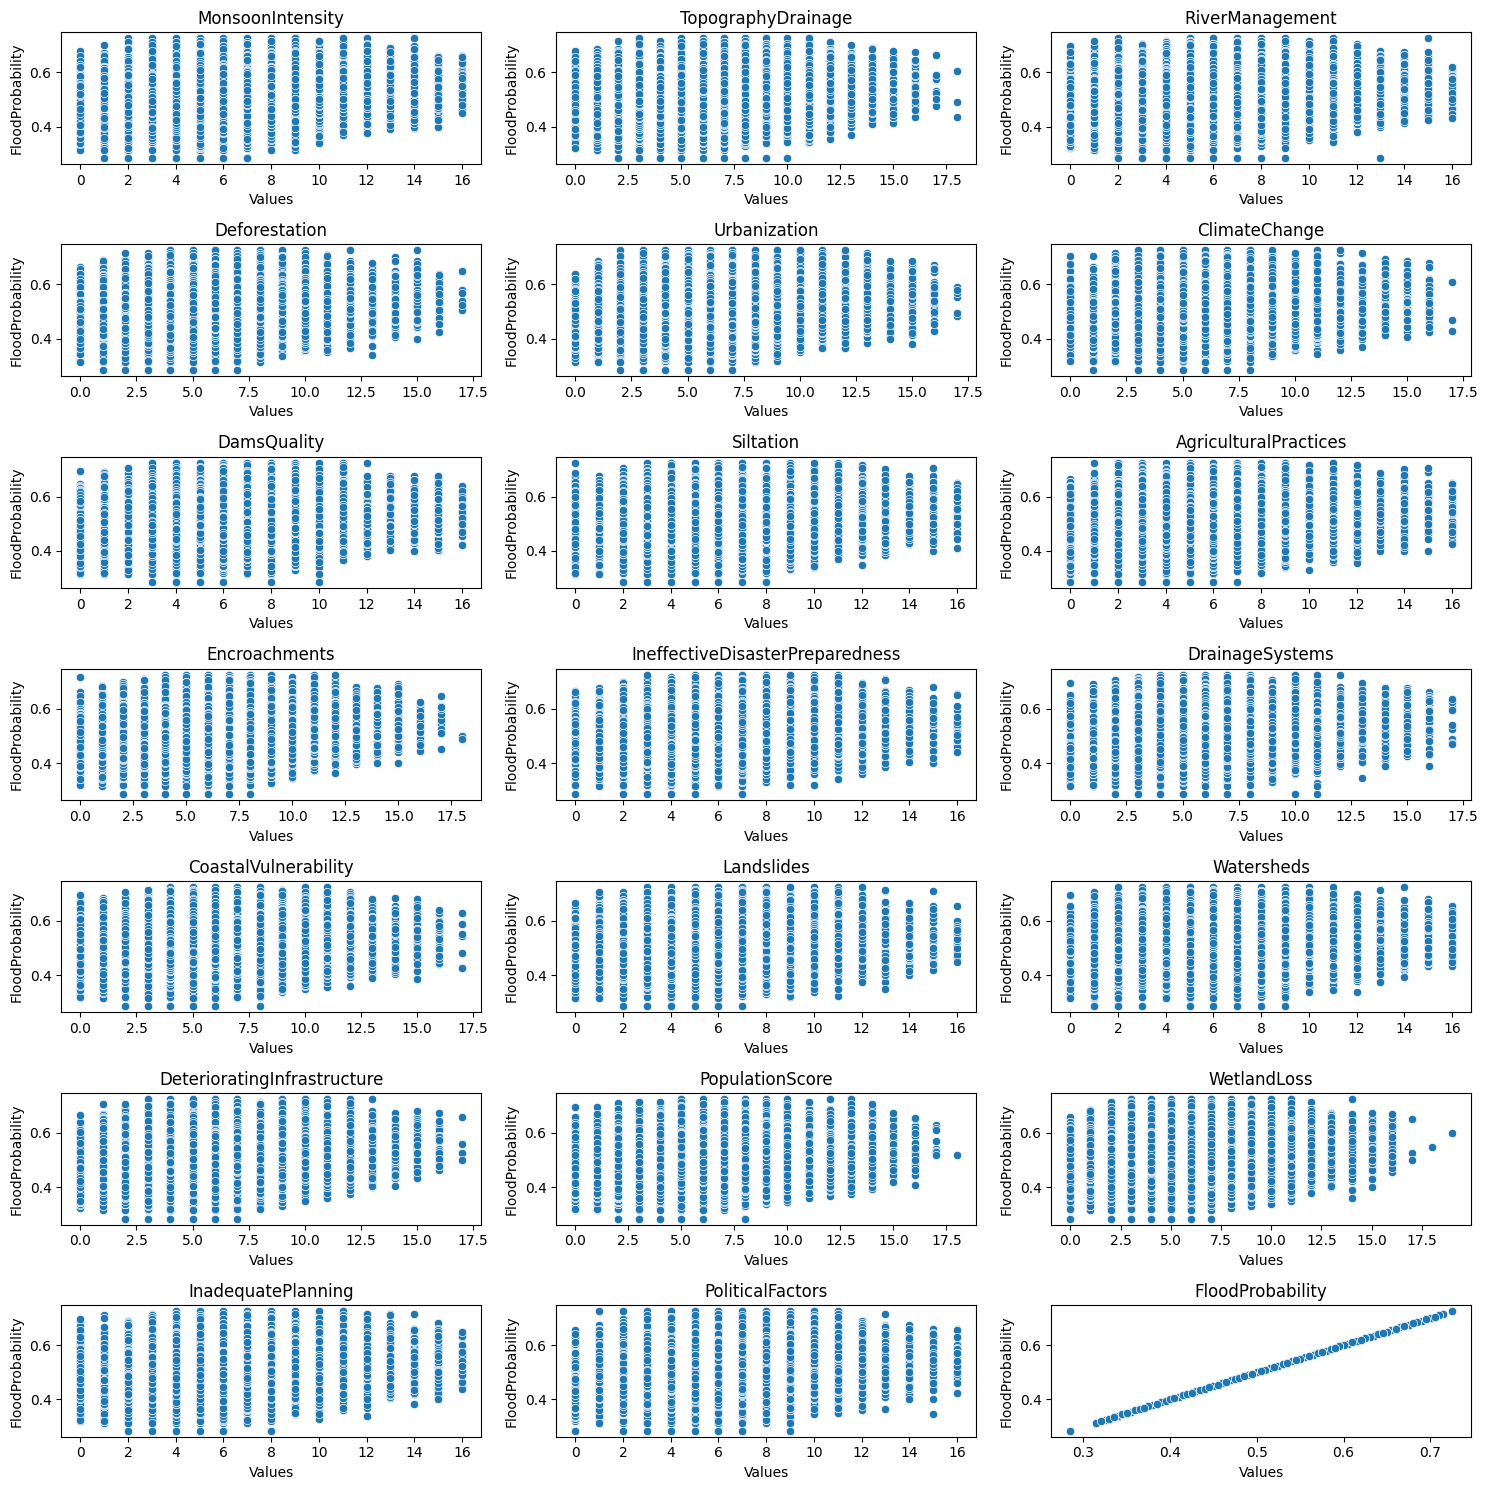

In [13]:
fig, axes = plt.subplots(7, 3, figsize=(15, 15))  # Create a 5x4 grid of subplots

for fac, ax in zip(factors, axes.flat):  # Loop over each factor and corresponding subplot
    sns.scatterplot(data=df, x=fac,y='FloodProbability',ax=ax)
    ax.set_title(fac)
    ax.set_xlabel('Values')

plt.tight_layout()
plt.show()

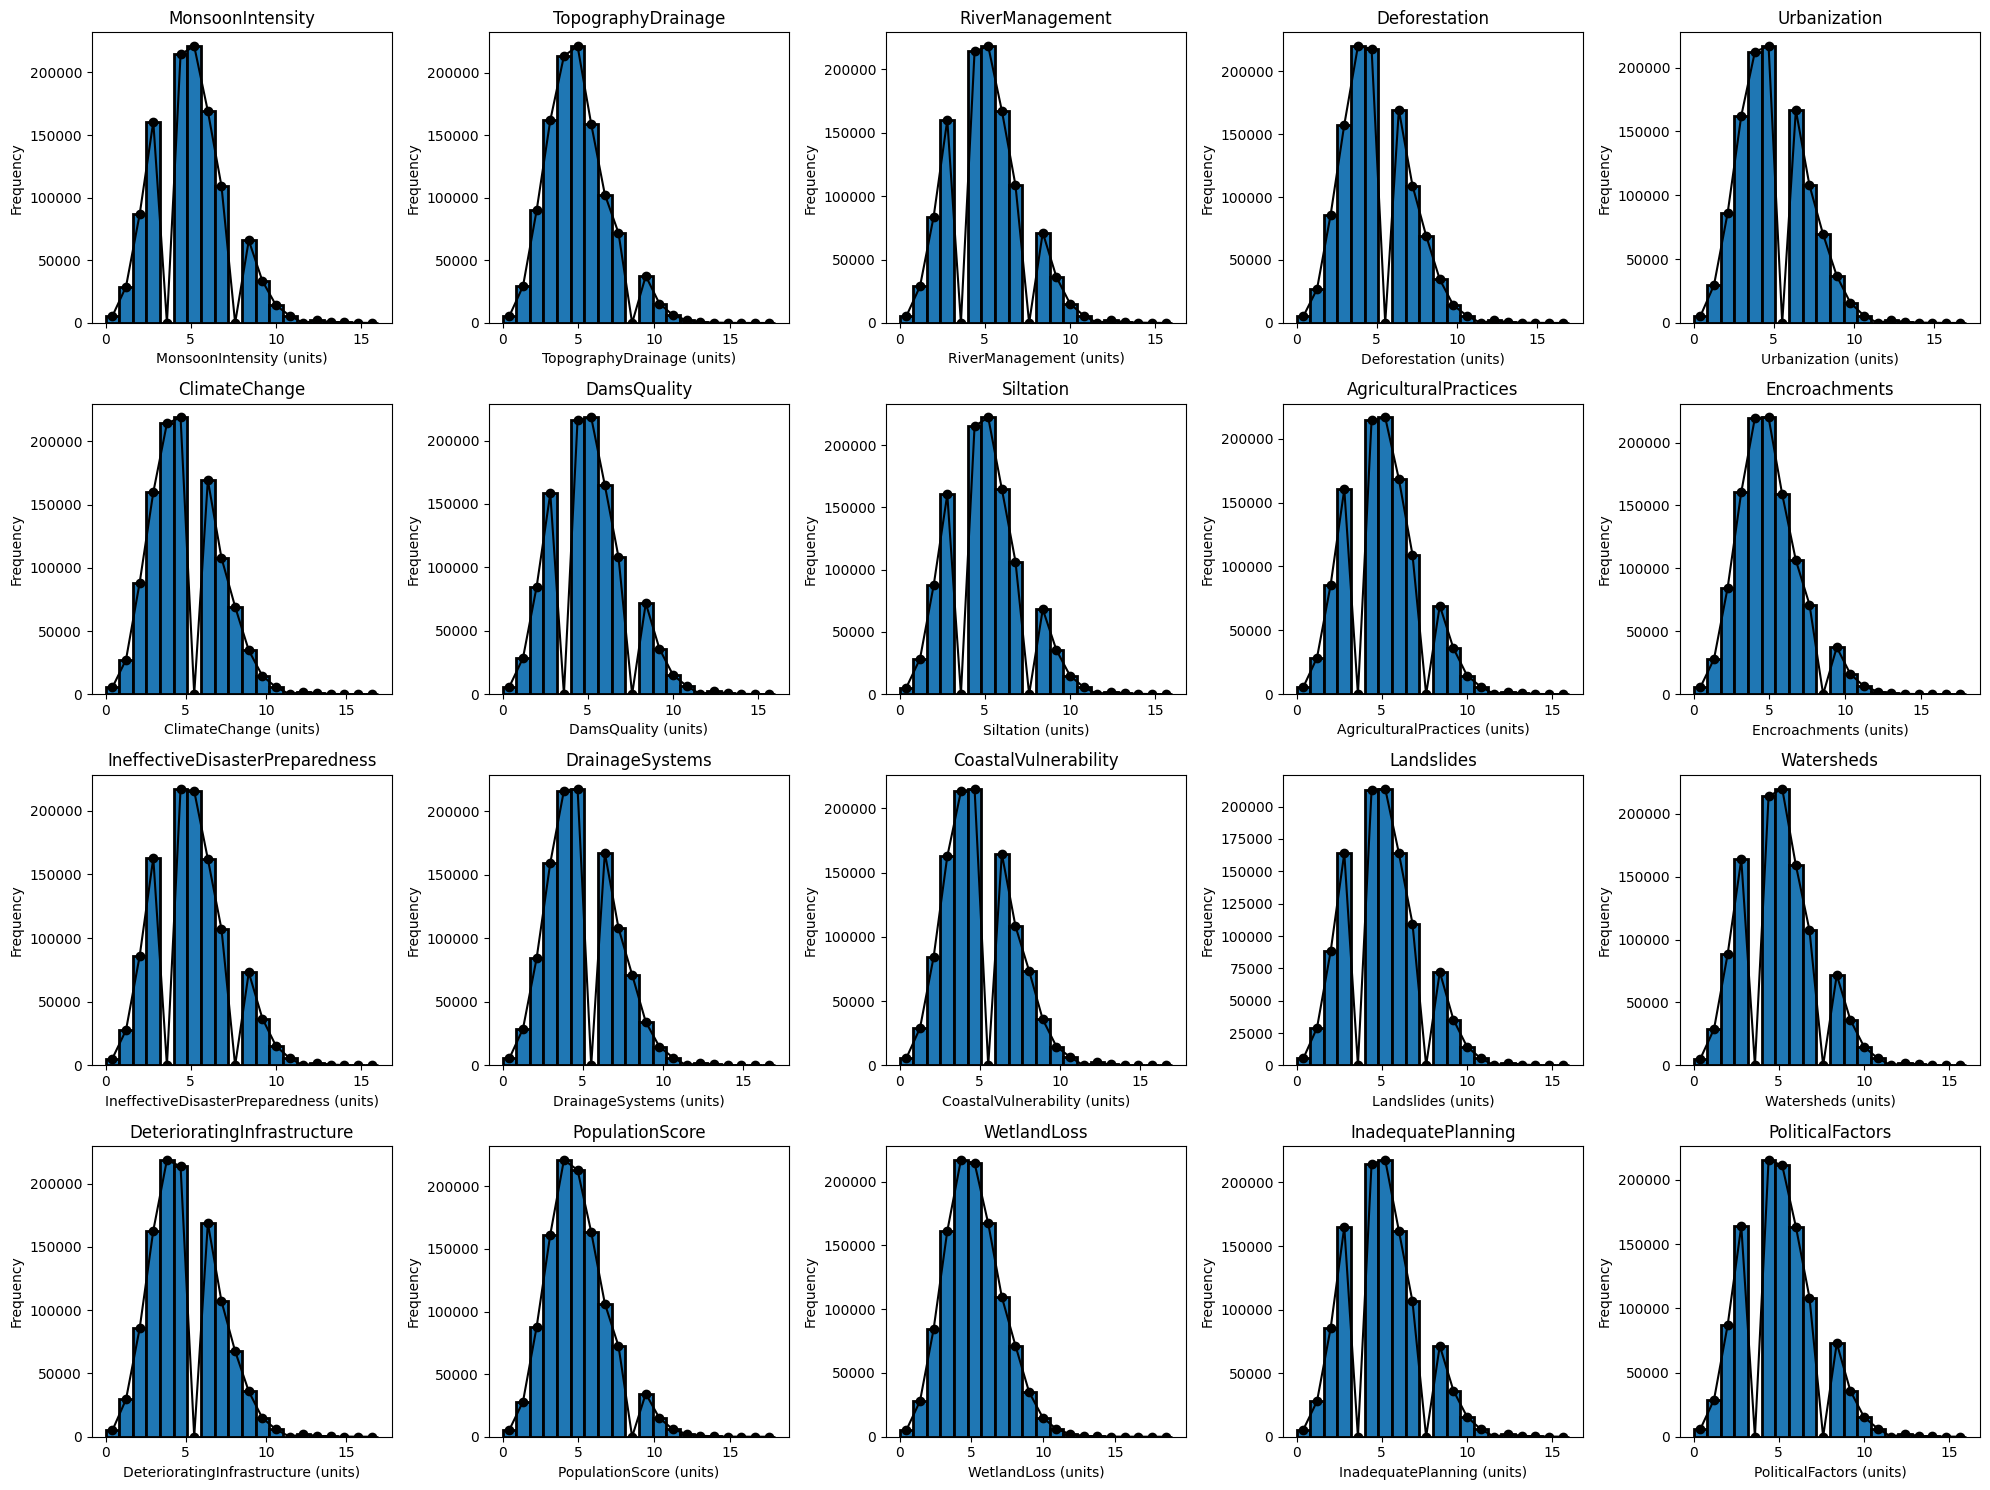

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))  # Create a 4x5 grid of subplots

for fac, ax in zip(factors, axes.flat):  

    counts, bins, patches = ax.hist(df[fac].dropna(), bins=20, edgecolor='black', linewidth=2)

    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    # Plot the line linking the tops of the bars
    ax.plot(bin_centers, counts, color='black', linestyle='-', marker='o')
    
    # Set the title and axis labels of each subplot
    ax.set_title(fac)
    ax.set_xlabel(f'{fac} (units)') 
    ax.set_ylabel('Frequency') 

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()  # Display the plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Count'>

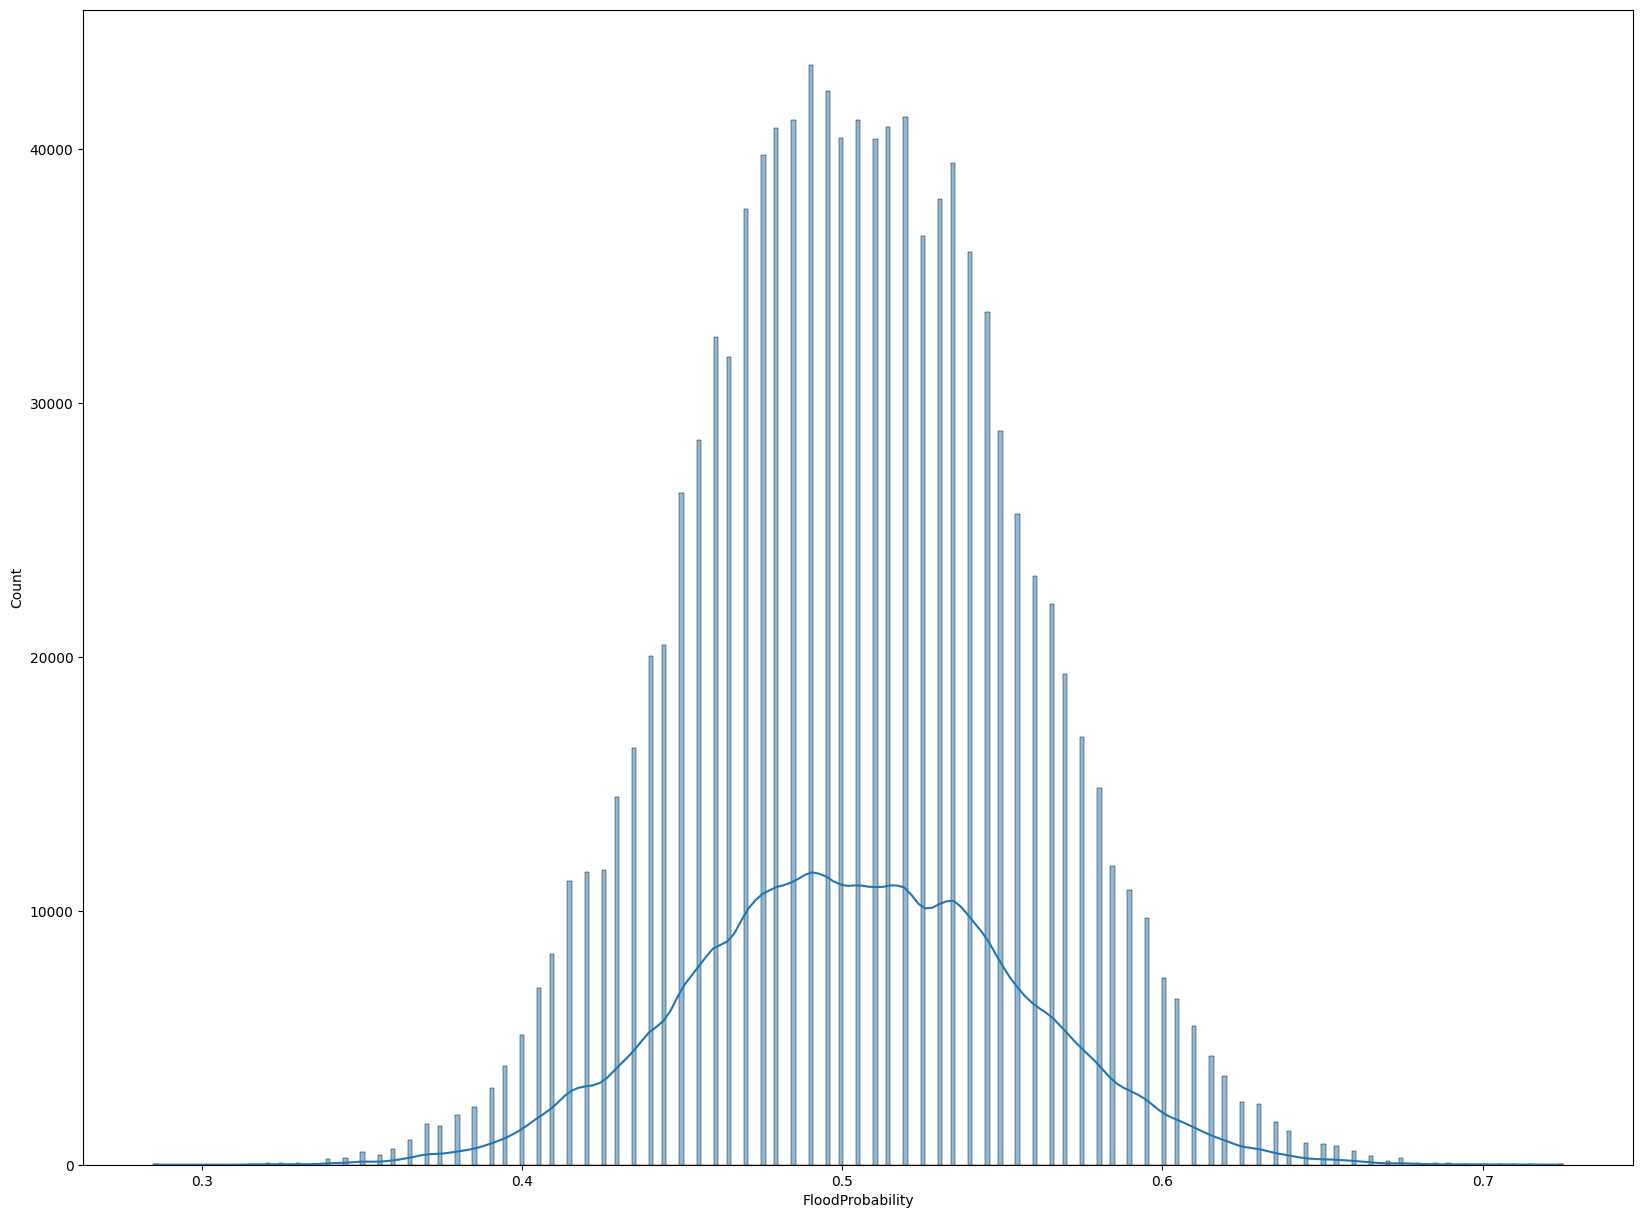

In [15]:
plt.figure(figsize=(20,15))
sns.histplot(data=df, x=df['FloodProbability'],kde=True)

<Axes: xlabel='MonsoonIntensity', ylabel='FloodProbability'>

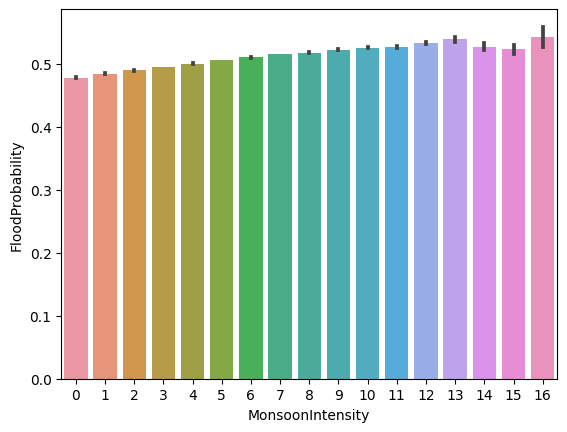

In [16]:
sns.barplot(x='MonsoonIntensity', y='FloodProbability', data=df)

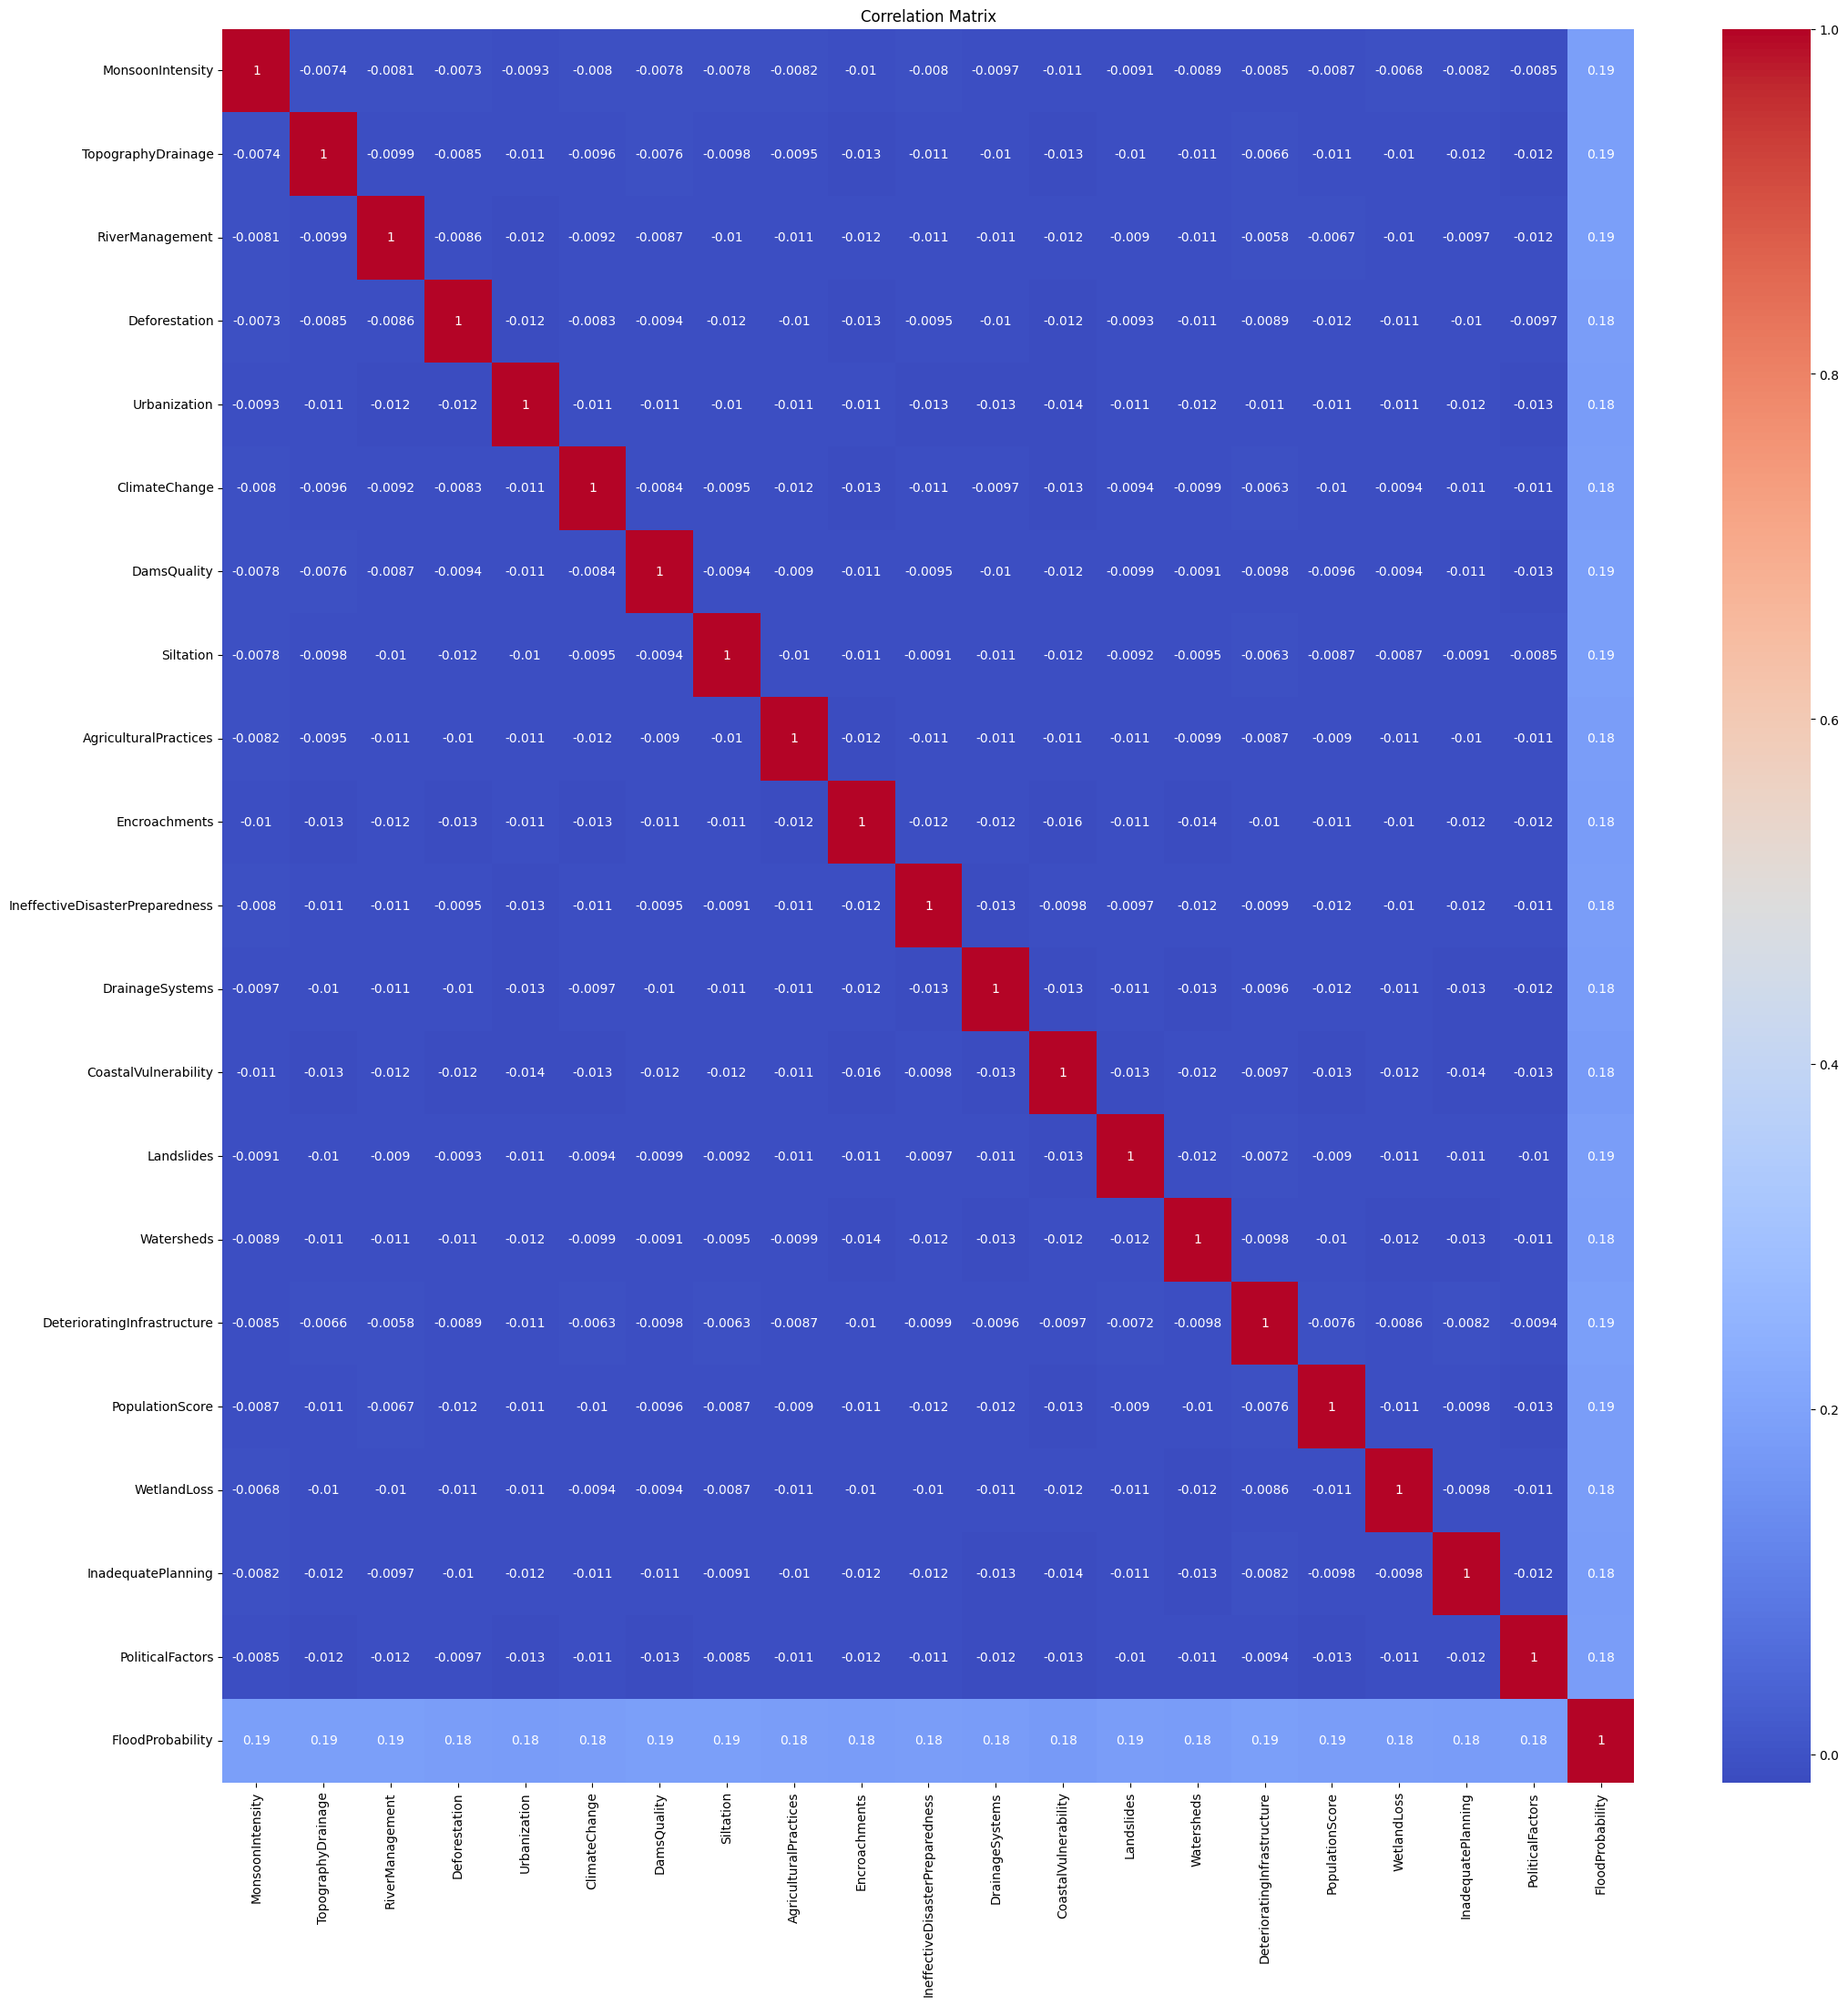

In [17]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Removing outlier does not improve the effectiveness of model predictor
We try 2 approach:
1. Remove outlier and check does it improve the score
2. Check sum of columns

In [36]:
# df= df.drop('sum',axis=1)
df['sum']=df.sum(axis=1)
df['sum']=df['sum']-df['FloodProbability']
df.head(5)



,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,sum
0,5,8,5,8,6,4,4,3,3,4,...,3,3,5,4,7,5,7,3,0.445,94.0
1,6,7,4,4,8,8,3,5,4,6,...,2,0,3,5,3,3,4,3,0.450,94.0
2,6,5,6,7,3,7,1,5,4,5,...,3,7,5,6,8,2,3,3,0.530,99.0
3,3,4,6,5,4,8,4,7,6,8,...,4,7,4,4,6,5,7,5,0.535,104.0
4,5,3,2,6,4,4,3,3,3,3,...,2,6,6,4,1,2,3,5,0.415,72.0


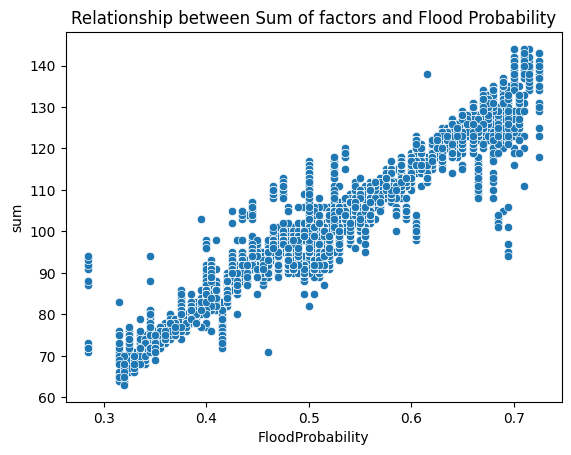

In [39]:
sns.scatterplot(data=df,y='sum',x='FloodProbability')
plt.title('Relationship between Sum of factors and Flood Probability')
plt.show()

In [19]:
#Remove outliner before training
new_df=df.copy()
for fac in factors:  # Loop over each factor and corresponding subplot
    q1=df[fac].quantile(0.25)
    q3=df[fac].quantile(0.75)
    iqr=q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    new_df=new_df[(new_df[fac]<=upper_limit) & (new_df[fac]>=lower_limit)]
    kept_percentage = new_df[fac].dropna().shape[0] / df[fac].shape[0] * 100
    print(f'Percentage of data points kept for {fac}: {kept_percentage:.2f}%')

Percentage of data points kept for MonsoonIntensity: 99.17%
Percentage of data points kept for TopographyDrainage: 98.32%
Percentage of data points kept for RiverManagement: 95.72%
Percentage of data points kept for Deforestation: 93.32%
Percentage of data points kept for Urbanization: 92.56%
Percentage of data points kept for ClimateChange: 91.85%
Percentage of data points kept for DamsQuality: 89.32%
Percentage of data points kept for Siltation: 88.60%
Percentage of data points kept for AgriculturalPractices: 87.90%
Percentage of data points kept for Encroachments: 85.49%
Percentage of data points kept for IneffectiveDisasterPreparedness: 84.81%
Percentage of data points kept for DrainageSystems: 82.58%
Percentage of data points kept for CoastalVulnerability: 81.83%
Percentage of data points kept for Landslides: 81.20%
Percentage of data points kept for Watersheds: 80.53%
Percentage of data points kept for DeterioratingInfrastructure: 79.91%
Percentage of data points kept for Populat

In [40]:
#PROCESS ML
x=new_df.drop(['FloodProbability'], axis=1)
y=new_df['FloodProbability']

x=df.drop(['FloodProbability'], axis=1)
y=df['FloodProbability']

test=test_data.drop('id',axis=1)

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [42]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((894365, 21), (894365,), (223592, 21), (223592,))

In [43]:
cat = CatBoostRegressor(random_seed=12,
                        iterations=1500,
                        depth=7,
                        colsample_bylevel=1.0,
                        verbose=False)
start = time()
cat.fit(x_train,y_train)
end=time()
cat_train_time_rand=end-start

In [44]:
prediction = cat.predict(x_test)
cat_est = explained_variance_score(prediction,y_test)
cat_score=cat.score(x_test,y_test) 
print(cat_train_time_rand,cat_est,cat_score)

152.22546362876892 0.8472163110467767 0.8673895233214262
